# Pengklasifikasi Kepribadian MBTI

Program ini akan mengklasifikasikan orang ke dalam tipe kepribadian MBTI berdasarkan 50 unggahan terakhir mereka di media sosial menggunakan naivebayesclassifier dasar

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import string
from nltk.classify import NaiveBayesClassifier

### Mengimpor dataset

In [2]:
data_set = pd.read_csv("UAS PM-(D)-202131193-FRENGKI JOSUA PURBA.csv")
data_set.tail()

,type,posts
8670,ISFP,'https://www.youtube.com/watch?v=t8edHB_h908||...
8671,ENFP,'So...if this thread already exists someplace ...
8672,INTP,'So many questions when i do these things. I ...
8673,INFP,'I am very conflicted right now when it comes ...
8674,INFP,'It has been too long since I have been on per...


### Memeriksa dataset untuk nilai yang hilang

In [3]:
data_set.isnull().any()

type     False
posts    False
dtype: bool

## Mengeksplorasi dataset

Ukuran dataset

In [4]:
data_set.shape

(8675, 2)

Mengeksplorasi tulisan di bidang tulisan

In [5]:
data_set.iloc[0,1].split('|||')

["'http://www.youtube.com/watch?v=qsXHcwe3krw",
 'http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg',
 'enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks',
 'What has been the most life-changing experience in your life?',
 'http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.',
 'May the PerC Experience immerse you.',
 'The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206',
 "Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...",
 '84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-ho

Menemukan jumlah postingan

In [6]:
len(data_set.iloc[1,1].split('|||'))

50

Menemukan nilai unik dari kolom tipe kepribadian

In [7]:
types = np.unique(np.array(data_set['type']))
types

array(['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP',
       'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP'],
      dtype=object)

Jumlah total posting untuk setiap jenis

In [8]:
total = data_set.groupby(['type']).count()*50
total

,posts
type,
ENFJ,9500
ENFP,33750
ENTJ,11550
ENTP,34250
ESFJ,2100
ESFP,2400
ESTJ,1950
ESTP,4450
INFJ,73500


Membuat grafik untuk visualisasi yang lebih baik

Text(0.5, 1.0, 'Total postingan untuk setiap tipe kepribadian')

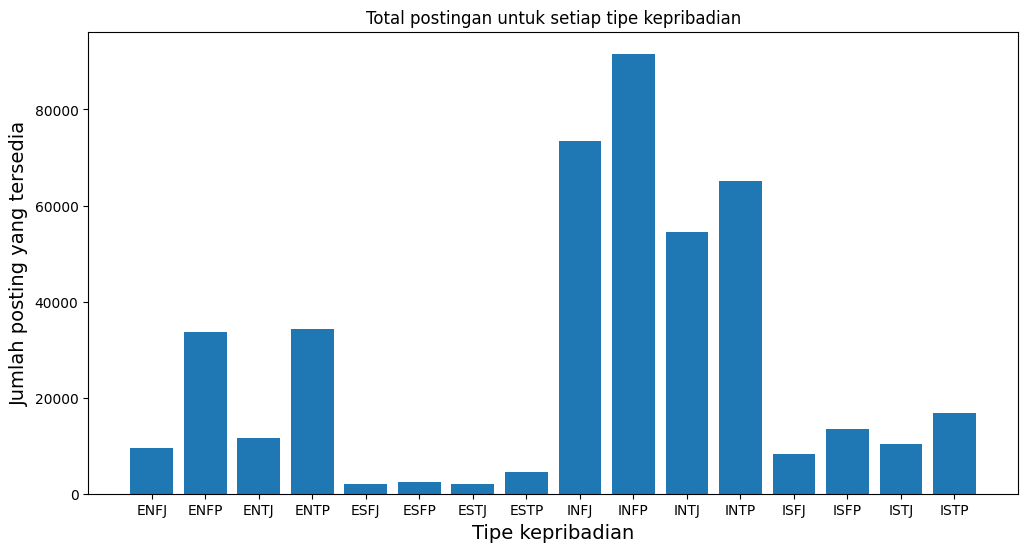

In [9]:
plt.figure(figsize = (12,6))

plt.bar(np.array(total.index), height = total['posts'],)
plt.xlabel('Tipe kepribadian', size = 14)
plt.ylabel('Jumlah posting yang tersedia', size = 14)
plt.title('Total postingan untuk setiap tipe kepribadian')

## Mengatur data untuk membuat model kata kantong

Mengelompokkan semua postingan berdasarkan tipe kepribadian mereka dan ***membuat kerangka data baru untuk menyimpan semua ini***.

In [10]:
all_posts= pd.DataFrame()
for j in types:
    temp1 = data_set[data_set['type']==j]['posts']
    temp2 = []
    for i in temp1:
        temp2+=i.split('|||')
    temp3 = pd.Series(temp2)
    all_posts[j] = temp3

In [11]:
all_posts.tail()

,ENFJ,ENFP,ENTJ,ENTP,ESFJ,ESFP,ESTJ,ESTP,INFJ,INFP,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP
9283,I am VERY particular. And I have not dated cer...,'Very true. The thing is to recognize and ove...,"Um, totally off ROFL. I am female, 30, no opin...",Actually I was none of these labels of alpha o...,NaN,NaN,NaN,NaN,"'So, hey everyone, me again. :happy: I want t...","Fantastic, I've avoided having to make my own ...","Arwen - Lord of the Rings Her faithfulness, r...",i love romance. i love the idea of inside joke...,NaN,"If it still serves a meaningful purpose, I don...","Everything points to ISTJ for me, but then som...","Group One I tend to be sociable, but sometimes..."
9284,Could you not tell the guy was INTP? Is that ...,i'm not real sure it's a great idea to date un...,Hahah that's hilarious,"Double post, dammit. >_<",NaN,NaN,NaN,NaN,"Put these all together, and you have a fair id...","I suppose in some respect, I used to be that w...","I'm taking this path myself right now, and I'm...",so not fair for those of us who are insecure a...,NaN,LOL I'm glad I could remind you of that. But y...,I think ESFJ is possible,https://www.youtube.com/watch?v=22wU-UITRIA
9285,"I cannot speak for all ENFJ's, but I am hard-w...","Watch some comedies, kids are joyful and make ...",https://www.onlineassessmenttool.com/instinctu...,Radicalism 83 Socialism 100 Tenderness 71.875 ...,NaN,NaN,NaN,NaN,I need to let go of my tendency to take too la...,"I only know one in real life, but personally, ...",If only! My life would be so much more ruthles...,"i hadn't heard of this, but i feel it's true i...",NaN,LOL. Thanks for making my day...INTPs are so f...,I disagree that Brandon is an INTJ. He cares a...,I'm trying to think... my first two detentions...
9286,Of course you do not see the point of the vide...,Meditation is great! Read up on TFT and EFT ta...,ENTJ - idunno...,Quoted for astonishing truth. One thing thoug...,NaN,NaN,NaN,NaN,"Hello, and welcome to the forum!!! :D There's ...",Am I evil? is a question I've asked myself tim...,"I don't know, maybe because I'm a Jungian mutt...",that's funny to me because i saved my chat log...,NaN,"That's fair I guess, but you're still trying t...","I thought so, but I don't think she rambles as...",I think you can. You should never let your pe...
9287,The types fit because the way they use their c...,2 Physical Touch 7 Quality Time 7 Words of...,I miscarried recently and was quite distraught...,Sure. I was taken aback by what I saw (and pre...,NaN,NaN,NaN,NaN,Oh that's just cruel. :D I'm going to go and G...,I've yet to meet an ENFJ in real life but you ...,"I do not watch TV, period. I haven't since 200...",wow. i just fell in love with myself lol,NaN,A lot of your responses seemed to indicate a p...,Cmart animalfromthesea you are both probably r...,I think it's just a part of human nature to ca...


### Membuat fungsi untuk memberi tanda pada kata

In [12]:
import nltk
import string

# Pastikan stopword NLTK telah diunduh
nltk.download('stopwords')
nltk.download('punkt')

useless_words = nltk.corpus.stopwords.words("english") + list(string.punctuation)

def build_bag_of_words_features_filtered(words):
    words = nltk.word_tokenize(words)
    return {
        word: 1 for word in words \
        if not word in useless_words
    }

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Pemeriksaan fungsi secara acak

In [13]:
build_bag_of_words_features_filtered(all_posts['INTJ'].iloc[1])

{'Dear': 1,
 'ENTJ': 1,
 'sub': 1,
 'Long': 1,
 'time': 1,
 'see': 1,
 'Sincerely': 1,
 'Alpha': 1}

## Membuat serangkaian fitur

In [14]:
features=[]
for j in types:
    temp1 = all_posts[j]
    temp1 = temp1.dropna() #tidak semua tipe kepribadian memiliki jumlah file yang sama
    features += [[(build_bag_of_words_features_filtered(i), j) \
    for i in temp1]]

Karena setiap tipe kepribadian memiliki jumlah pos yang berbeda, maka pos-pos tersebut harus dibagi sesuai dengan tipe kepribadiannya. Mengambil 80% untuk pelatihan dan 20% untuk pengujian

In [15]:
split=[]
for i in range(16):
    split += [len(features[i]) * 0.8]
split = np.array(split,dtype = int)

In [16]:
split

array([7430, 7430, 7430, 7430, 1614, 1772, 1536, 3469, 7430, 7430, 7430,
       7430, 6496, 7430, 7430, 7430])

Data untuk pelatihan

In [17]:
train=[]
for i in range(16):
    train += features[i][:split[i]] 

Melatih model

In [18]:
sentiment_classifier = NaiveBayesClassifier.train(train)

Menguji model pada dataset yang telah dilatih untuk mengetahui keakuratannya

In [19]:
nltk.classify.util.accuracy(sentiment_classifier, train)*100

43.93429727687674

Membuat data pengujian

In [20]:
test=[]
for i in range(16):
    test += features[i][split[i]:]

Menguji model pada dataset uji yang belum pernah dilihat sebelumnya

In [21]:
nltk.classify.util.accuracy(sentiment_classifier, test)*100

10.425030004552415

# Model ini bekerja dengan efisiensi hanya 10%, yang cukup buruk.

## Oleh karena itu, alih-alih memilih ke-16 jenis kepribadian sebagai fitur unik, saya menjelajahi dataset lebih jauh dan memutuskan untuk menyederhanakannya.

Myers Briggs Type Indicator (atau disingkat MBTI) adalah sistem tipe kepribadian yang membagi setiap orang ke dalam 16 tipe kepribadian yang berbeda di 4 sumbu:

- Introversion (I) – Extroversion (E)
- Intuition (N) – Sensing (S)
- Thinking (T) – Feeling (F)
- Judging (J) – Perceiving (P)
<br><br>
Saya akan menggunakan ini dan membuat 4 pengklasifikasi untuk mengklasifikasikan orang tersebut 

## Membuat pengklasifikasi untuk Introversi (I) dan Ekstroversi (E)

**Catatan:** Detail untuk langkah-langkah di sini, sama dengan langkah-langkah sewaktu membuat model di atas, oleh karena itu, saya hanya akan menjelaskan perubahannya saja

In [22]:
# Fitur untuk model kantong kata
features=[]
for j in types:
    temp1 = all_posts[j]
    temp1 = temp1.dropna() #tidak semua tipe kepribadian memiliki jumlah file yang sama
    if('I' in j):
        features += [[(build_bag_of_words_features_filtered(i), 'introvert') \
        for i in temp1]]
    if('E' in j):
        features += [[(build_bag_of_words_features_filtered(i), 'extrovert') \
        for i in temp1]]

Data untuk pelatihan

In [23]:
train=[]
for i in range(16):
    train += features[i][:split[i]] 

Melatih model

In [24]:
IntroExtro = NaiveBayesClassifier.train(train)

Menguji model pada dataset yang telah dilatih untuk mengetahui keakuratannya

In [25]:
nltk.classify.util.accuracy(IntroExtro, train)*100

80.76321972323711

Membuat data pengujian

In [26]:
test=[]
for i in range(16):
    test += features[i][split[i]:]

Menguji model pada dataset uji yang belum pernah dilihat sebelumnya

In [27]:
nltk.classify.util.accuracy(IntroExtro, test)*100

58.109506269916814

Melihat bahwa model ini memiliki hasil yang cukup bagus, saya akan mengulangi hal yang sama dengan ciri-ciri lainnya

## Membuat pengklasifikasi untuk Intuisi (N) dan Penginderaan (S)

In [28]:
# Fitur untuk model kantong kata
features=[]
for j in types:
    temp1 = all_posts[j]
    temp1 = temp1.dropna() #tidak semua tipe kepribadian memiliki jumlah file yang sama
    if('N' in j):
        features += [[(build_bag_of_words_features_filtered(i), 'Intuition') \
        for i in temp1]]
    if('E' in j):
        features += [[(build_bag_of_words_features_filtered(i), 'Sensing') \
        for i in temp1]]

Data untuk pelatihan

In [29]:
train=[]
for i in range(16):
    train += features[i][:split[i]] 

Melatih model

In [30]:
IntuitionSensing = NaiveBayesClassifier.train(train)

Menguji model pada dataset yang telah dilatih untuk mengetahui keakuratannya

In [31]:
nltk.classify.util.accuracy(IntuitionSensing, train)*100

70.01343877603763

Membuat data pengujian

In [32]:
test=[]
for i in range(16):
    test += features[i][split[i]:]

Menguji model pada dataset uji yang belum pernah dilihat sebelumnya

In [33]:
nltk.classify.util.accuracy(IntuitionSensing, test)*100

54.433447788325594

## Membuat pengklasifikasian untuk Thinking (T) and Feeling (F)

In [34]:
# Fitur untuk model kantong kata
features=[]
for j in types:
    temp1 = all_posts[j]
    temp1 = temp1.dropna() #tidak semua tipe kepribadian memiliki jumlah file yang sama
    if('T' in j):
        features += [[(build_bag_of_words_features_filtered(i), 'Thinking') \
        for i in temp1]]
    if('F' in j):
        features += [[(build_bag_of_words_features_filtered(i), 'Feeling') \
        for i in temp1]]

Data untuk pelatihan

In [35]:
train=[]
for i in range(16):
    train += features[i][:split[i]] 

Melatih model

In [36]:
ThinkingFeeling = NaiveBayesClassifier.train(train)

Menguji model pada dataset yang telah dilatih untuk mengetahui keakuratannya

In [37]:
nltk.classify.util.accuracy(ThinkingFeeling, train)*100

79.632983843423

Membuat data pengujian

In [38]:
test=[]
for i in range(16):
    test += features[i][split[i]:]

Menguji model pada dataset uji yang belum pernah dilihat sebelumnya

In [39]:
nltk.classify.util.accuracy(ThinkingFeeling, test)*100

59.47936928361545

## Membuat pengklasifikasi untuk Menilai (J) dan Mempersepsi (P)


In [40]:
# Fitur untuk model kantong kata
features=[]
for j in types:
    temp1 = all_posts[j]
    temp1 = temp1.dropna() #tidak semua tipe kepribadian memiliki jumlah file yang sama
    if('J' in j):
        features += [[(build_bag_of_words_features_filtered(i), 'Judging') \
        for i in temp1]]
    if('P' in j):
        features += [[(build_bag_of_words_features_filtered(i), 'Percieving') \
        for i in temp1]]

Data untuk pelatihan

In [41]:
train=[]
for i in range(16):
    train += features[i][:split[i]] 

Melatih model

In [42]:
JudgingPercieiving = NaiveBayesClassifier.train(train)

Menguji model pada dataset yang telah dilatih untuk mengetahui keakuratannya

In [43]:
nltk.classify.util.accuracy(JudgingPercieiving, train)*100

79.38458035335397

Membuat data pengujian

In [44]:
test=[]
for i in range(16):
    test += features[i][split[i]:]

Menguji model pada dataset uji yang belum pernah dilihat sebelumnya

In [45]:
nltk.classify.util.accuracy(JudgingPercieiving, test)*100

54.372387534660426

# Merangkum hasil dari model
***


In [46]:
temp = {'train' : [81.12443979837917,70.14524215640667,80.03456948570128,79.79341109742592], 'test' : [58.20469312585358,54.46262259027357,59.41315234035509,54.40549600629061]}
results = pd.DataFrame.from_dict(temp, orient='index', columns=['Introvert - Extrovert', 'Intuition - Sensing', 'Thinking - Feeling', 'Judging - Percieiving'])
results

,Introvert - Extrovert,Intuition - Sensing,Thinking - Feeling,Judging - Percieiving
train,81.124440,70.145242,80.034569,79.793411
test,58.204693,54.462623,59.413152,54.405496


Merencanakan hasil untuk daya tarik yang lebih baik

Text(0.5, 1.0, 'Total postingan untuk setiap tipe kepribadian')

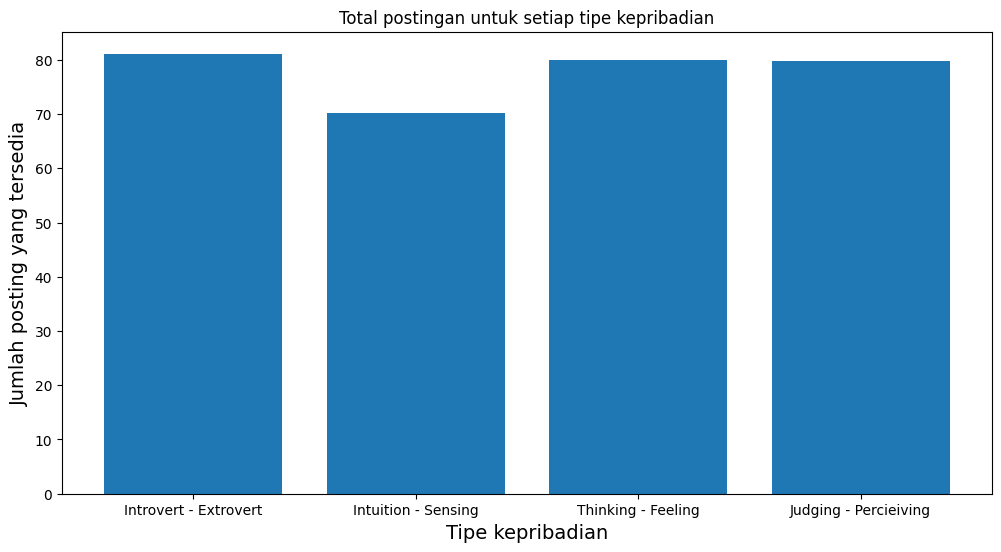

In [47]:
plt.figure(figsize = (12,6))

plt.bar(np.array(results.columns), height = results.loc['train'],)
plt.xlabel('Tipe kepribadian', size = 14)
plt.ylabel('Jumlah posting yang tersedia', size = 14)
plt.title('Total postingan untuk setiap tipe kepribadian')

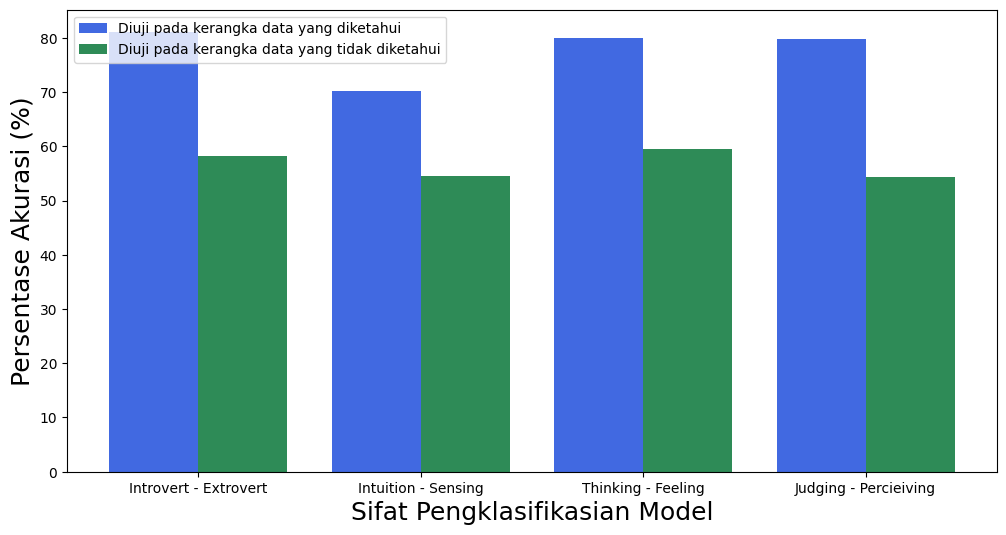

In [48]:
labels = np.array(results.columns)

training = results.loc['train']
ind = np.arange(4)
width = 0.4
fig = plt.figure()
ax = fig.add_subplot(111)
rects1 = ax.bar(ind, training, width, color='royalblue')

testing = results.loc['test']
rects2 = ax.bar(ind+width, testing, width, color='seagreen')

fig.set_size_inches(12, 6)
fig.savefig('Results.png', dpi=200)

ax.set_xlabel('Sifat Pengklasifikasian Model', size = 18)
ax.set_ylabel('Persentase Akurasi (%)', size = 18)
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(labels)
ax.legend((rects1[0], rects2[0]), ('Diuji pada kerangka data yang diketahui', 'Diuji pada kerangka data yang tidak diketahui'))
plt.show()

# Menguji model untuk memprediksi sifat saya memberi makan beberapa tulisan quora saya

tautan ke umpan jawaban quora saya: https://www.quora.com/profile/Divya-Bramhecha

Mendefinisikan fungsi yang memasukkan input tulisan, memberi tanda, dan kemudian memprediksi output berdasarkan pengklasifikasi kita sebelumnya

In [49]:
def MBTI(input):
    tokenize = build_bag_of_words_features_filtered(input)
    ie = IntroExtro.classify(tokenize)
    Is = IntuitionSensing.classify(tokenize)
    tf = ThinkingFeeling.classify(tokenize)
    jp = JudgingPercieiving.classify(tokenize)
    
    mbt = ''
    
    if(ie == 'introvert'):
        mbt+='I'
    if(ie == 'extrovert'):
        mbt+='E'
    if(Is == 'Intuition'):
        mbt+='N'
    if(Is == 'Sensing'):
        mbt+='S'
    if(tf == 'Thinking'):
        mbt+='T'
    if(tf == 'Feeling'):
        mbt+='F'
    if(jp == 'Judging'):
        mbt+='J'
    if(jp == 'Percieving'):
        mbt+='P'
    return(mbt)
    

### Membuat fungsi lain yang mengambil semua postingan saya sebagai masukan dan mengeluarkan grafik yang menunjukkan persentase setiap sifat yang terlihat di setiap postingan dan menyimpulkan menampilkan kepribadian Anda sebagai judul grafik

**Catatan:** Masukan harus berupa larik dari postingan

In [50]:
def tellmemyMBTI(input, name, traasits=[]):
    a = []
    trait1 = pd.DataFrame([0,0,0,0],['I','N','T','J'],['count'])
    trait2 = pd.DataFrame([0,0,0,0],['E','S','F','P'],['count'])
    for i in input:
        a += [MBTI(i)]
    for i in a:
        for j in ['I','N','T','J']:
            if(j in i):
                trait1.loc[j]+=1                
        for j in ['E','S','F','P']:
            if(j in i):
                trait2.loc[j]+=1 
    trait1 = trait1.T
    trait1 = trait1*100/len(input)
    trait2 = trait2.T
    trait2 = trait2*100/len(input)
    
    
    #Menemukan kepribadian
    YourTrait = ''
    for i,j in zip(trait1,trait2):
        temp = max(trait1[i][0],trait2[j][0])
        if(trait1[i][0]==temp):
            YourTrait += i  
        if(trait2[j][0]==temp):
            YourTrait += j
    traasits +=[YourTrait] 
    
    #Plotting
    
    labels = np.array(results.columns)

    intj = trait1.loc['count']
    ind = np.arange(4)
    width = 0.4
    fig = plt.figure()
    ax = fig.add_subplot(111)
    rects1 = ax.bar(ind, intj, width, color='royalblue')

    esfp = trait2.loc['count']
    rects2 = ax.bar(ind+width, esfp, width, color='seagreen')

    fig.set_size_inches(10, 7)
    
    

    ax.set_xlabel('Finding the MBTI Trait', size = 18)
    ax.set_ylabel('Trait Percent (%)', size = 18)
    ax.set_xticks(ind + width / 2)
    ax.set_xticklabels(labels)
    ax.set_yticks(np.arange(0,105, step= 10))
    ax.set_title('Your Personality is '+YourTrait,size = 20)
    plt.grid(True)
    
    
    fig.savefig(name+'.png', dpi=200)
    
    plt.show()
    return(traasits)
        

# Mengimpor jawaban quora saya dari file teks

Saya menyalin semua jawaban saya dari tautan yang saya berikan sebelumnya (saya memecah paragraf sebagai posting terpisah)

In [51]:
My_writings = open("Myquora.txt")
my_writing = My_writings.readlines()
#my_writing

In [52]:
my_posts = my_writing[0].split('|||')
len(my_posts)
#my_posts

38

# Menggunakan pengklasifikasi untuk memprediksi tipe kepribadian saya

C:\Users\Acer\AppData\Local\Temp\ipykernel_3260\1947967088.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  temp = max(trait1[i][0],trait2[j][0])
C:\Users\Acer\AppData\Local\Temp\ipykernel_3260\1947967088.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if(trait1[i][0]==temp):
C:\Users\Acer\AppData\Local\Temp\ipykernel_3260\1947967088.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if(trait2[j][0]==temp):


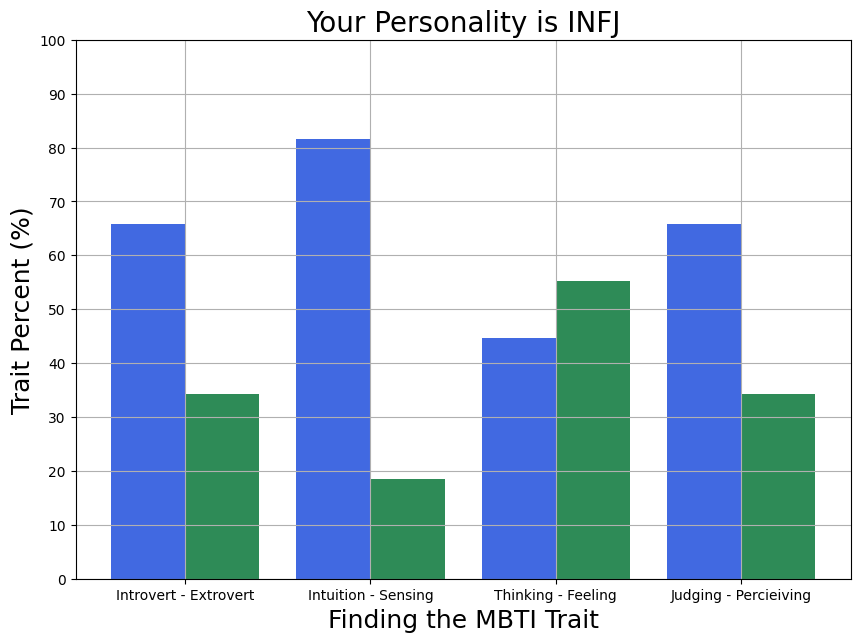

In [53]:
trait=tellmemyMBTI(my_posts, 'Divy')


# Catatan penutup

Profil saya https://www.linkedin.com/in/frengkijosuapurba/.

Saya cukup senang karena dengan menggunakan model dasar seperti itu.

# Sanaya profil

In [54]:
My_writings = open("Sanayapoem.txt")
my_writing = My_writings.readlines()
#my_writing

In [55]:
my_posts = my_writing[0].split('|||')
len(my_posts)
#my_posts

11

C:\Users\Acer\AppData\Local\Temp\ipykernel_3260\1947967088.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  temp = max(trait1[i][0],trait2[j][0])
C:\Users\Acer\AppData\Local\Temp\ipykernel_3260\1947967088.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if(trait1[i][0]==temp):
C:\Users\Acer\AppData\Local\Temp\ipykernel_3260\1947967088.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if(trait2[j][0]==temp):


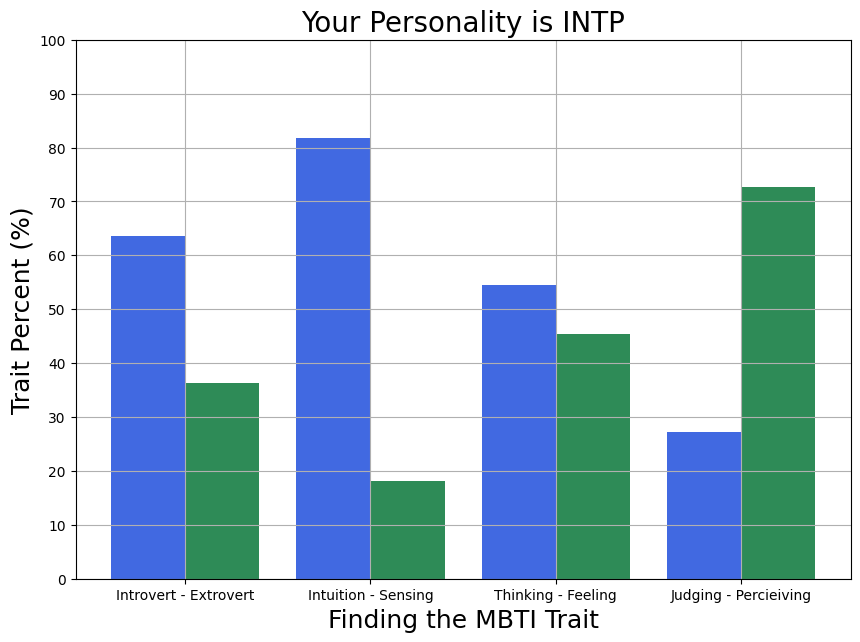

In [56]:
trait = tellmemyMBTI(my_posts,'sanaya')

# Valentin Pyataev

In [57]:
My_writings = open("Valentin pyatev.txt")
my_writing = My_writings.readlines()
#my_writing

In [58]:
my_posts = my_writing[0].split('|||')
len(my_posts)
#my_posts

7

C:\Users\Acer\AppData\Local\Temp\ipykernel_3260\1947967088.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  temp = max(trait1[i][0],trait2[j][0])
C:\Users\Acer\AppData\Local\Temp\ipykernel_3260\1947967088.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if(trait1[i][0]==temp):
C:\Users\Acer\AppData\Local\Temp\ipykernel_3260\1947967088.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if(trait2[j][0]==temp):


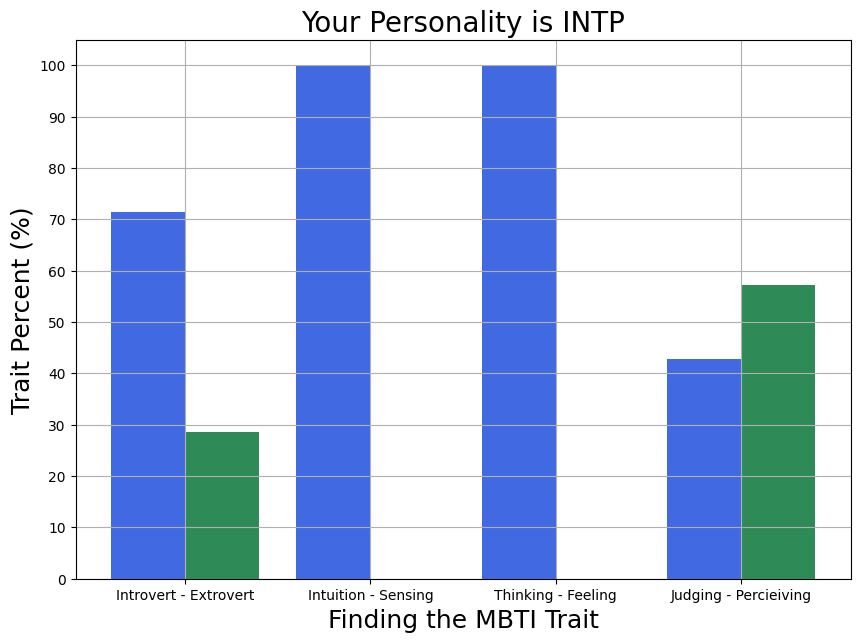

In [59]:
trait=tellmemyMBTI(my_posts,'Valentin')

# MIT gurukul people

In [60]:
My_writings = open("All text.txt")
my_writing = My_writings.readlines()
a =[''];
for i in my_writing:
    a[0]=a[0]+i
len(a)

1

In [61]:
my_posts = a[0].split('&&&')
len(my_posts)
#my_posts

1

Posting untuk setiap orang

In [62]:
alls = [None]*len(my_posts)
for i in range(len(my_posts)):
    alls[i] = my_posts[i].split('|||') 

Koneksi ID email

In [63]:
Names = open("Names.txt")
names = Names.readlines()
#names

In [64]:
for i in range(len(names)):
    names[i] = names[i].replace('@gmail.com\n','')
    print(names[i])
names[len(names)-1]=names[len(names)-1].replace('@gmail.com','')

mearnav4
amankhemlani12
saumyarao2001
pariza2008
mishthifrooti
aahanaagarwal02
jahnavishahani01
milap99shah
arnavkadam44
harlalkasanyam
refan7401
olafdange5
raju.rastogi@gmail.com


C:\Users\Acer\AppData\Local\Temp\ipykernel_3260\1947967088.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  temp = max(trait1[i][0],trait2[j][0])
C:\Users\Acer\AppData\Local\Temp\ipykernel_3260\1947967088.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if(trait1[i][0]==temp):
C:\Users\Acer\AppData\Local\Temp\ipykernel_3260\1947967088.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if(trait2[j][0]==temp):


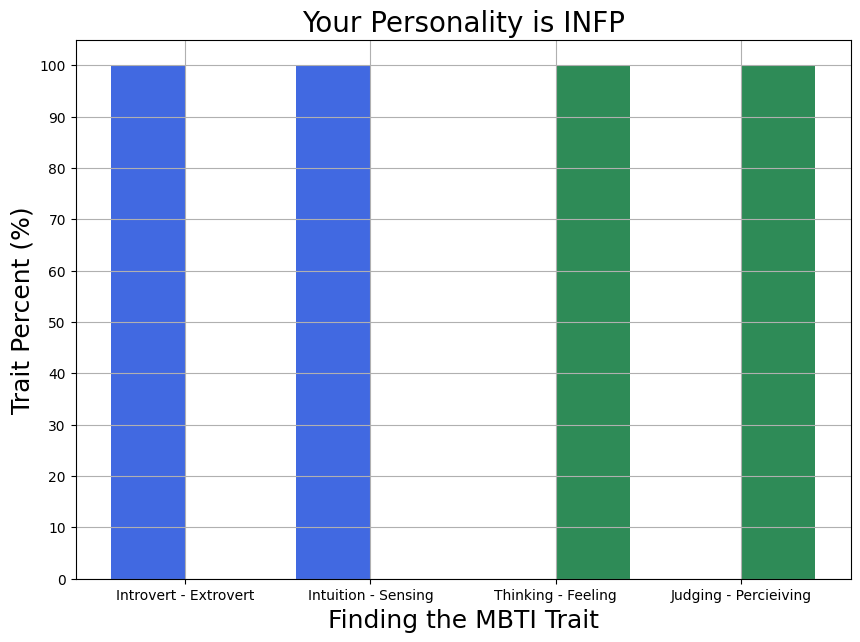

In [65]:
for i in range(len(alls)):
    trait=tellmemyMBTI(alls[i],names[i])

In [66]:
trait

['INFJ', 'INTP', 'INTP', 'INFP']